# 判別分析

## ライブラリなど読み込み

In [30]:
import numpy as np               
import matplotlib.pyplot as plt
from common import mlbench as ml                      #  講習会のためのスクリプト
from common.contourFittedClass import cplot    #  等高線プロットのためのスクリプト

## サポートベクトルマシン(SVM)

## データ生成     

In [31]:
X,y = ml.twoDnormals(200, cl=2, sd=1)  # トレーニングデータ

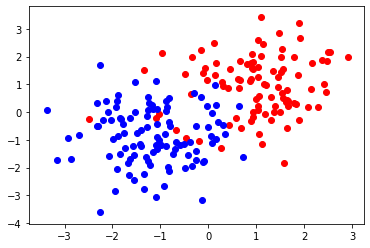

In [32]:
plt.scatter(X[y==0,0],X[y==0,1], c='red')
plt.scatter(X[y==1,0],X[y==1,1], c='blue')
plt.show()

## サポートベクトルマシン
 sklearn.svm.SVC  

In [33]:
from sklearn.svm import SVC                 #  モジュール読み込み

In [34]:
sv = SVC(kernel="linear", coef0=1)      #  線形判別モデル
sv.fit(X,y)                                     # サポートベクトルマシンでデータを学習

SVC(C=1.0, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [35]:
py = sv.predict(X)    # ラベル予測
np.mean(py != y)     # トレーニング誤差

0.08

In [36]:
1-sv.score(X,y)         # トレーニング誤差： score を使うこともできる

0.07999999999999996

In [37]:
# 設定パラメータの詳細
sv.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 1,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto_deprecated',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## 予測ラベル・テスト誤差

In [38]:
tX,ty = ml.twoDnormals(1000, cl=2, sd=1)   # テストデータ  
py = sv.predict(tX)     # 予測ラベル
np.mean(py != ty)       # テスト誤差

0.101

In [39]:
1-sv.score(tX,ty)        # テスト誤差

0.10099999999999998

## プロット

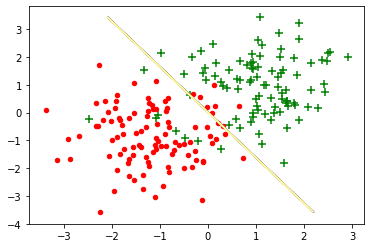

In [40]:
cplot(sv,X,y)

## カーネルSVM
- sklearn.svm.SVC
- kernel オプション

## データ

In [41]:
X,y = ml.spirals(300, cycles=1,sd=0.15)         # トレーニングデータ
tX,ty = ml.spirals(1000,cycles=1,sd=0.15)    # テストデータ

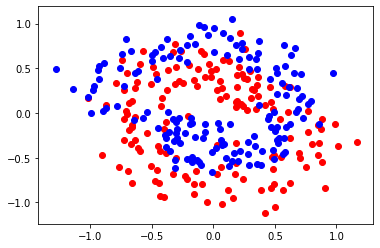

In [42]:
# トレーニングデータのプロット
plt.scatter(X[y==0,0],X[y==0,1], c='red')
plt.scatter(X[y==1,0],X[y==1,1], c='blue')
plt.show()

## SVM：カーネルは2次多項式

In [43]:
sv2 = SVC(kernel="poly",degree=2, gamma=1, coef0=1).fit(X,y)  # 設定と学習

テスト誤差： 0.43500000000000005


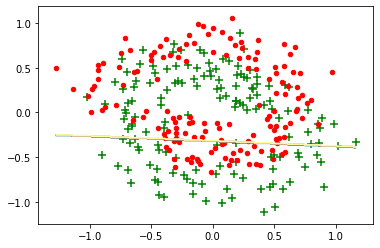

In [44]:
# プロット：2次多項式カーネル
print("テスト誤差：", 1-sv2.score(tX,ty))
cplot(sv2,X,y)

## SVM：カーネルは3次多項式

In [45]:
sv3 = SVC(kernel="poly",degree=3,gamma=1,coef0=1).fit(X,y)   # 設定と学習

テスト誤差： 0.252


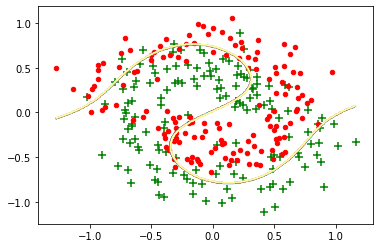

In [46]:
# プロット：3次多項式カーネル
print("テスト誤差：", 1-sv3.score(tX,ty))
cplot(sv3,X,y)

## モデルパラメータの選択

## 交差検証法
sklearn.model_selection.cross_validate

In [47]:
# モジュール読み込み
from sklearn.model_selection import cross_validate 

## データ

In [48]:
X,y    = ml.spirals(200,  cycles=1.2, sd=0.1)       # トレーニングデータ
tX,ty = ml.spirals(1000,cycles=1.2, sd=0.1)     # テストデータ 

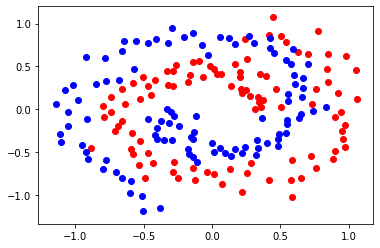

In [49]:
plt.scatter(X[y==0,0],X[y==0,1], c='red')
plt.scatter(X[y==1,0],X[y==1,1], c='blue')
plt.show()

## 交差検証法

In [50]:
sv = SVC(kernel="rbf", gamma=10, C=1)           # ガウスカーネルのSVMモデルを設定

In [51]:
cv = cross_validate(sv,X,y,scoring='accuracy',cv=5)   # 交差検証法：K=5
1-cv['test_score']                                                             # 交差検証法の各ブロックごとの誤差

array([0.425, 0.45 , 0.5  , 0.425, 0.525])

In [52]:
1-np.mean(cv['test_score'])        # テスト誤差の推定値

0.46499999999999997

## ガウスカーネル：gamma の候補

In [53]:
# ガウスカーネルのgammaの候補： データの間隔から候補を決める
from scipy.spatial import distance
dm = distance.pdist(X)                     # 距離行列の計算

# 候補の値： データ間の距離のパーセント点
cg = 1/np.percentile(dm,np.arange(1,100,2))**2 
cg

array([65.63085131, 25.60996122, 14.62297363, 10.17746578,  7.81777479,
        6.30389066,  5.28009745,  4.52477139,  3.95124818,  3.49820941,
        3.13190622,  2.80708687,  2.54532181,  2.33426433,  2.15065583,
        1.97469528,  1.83615841,  1.69918628,  1.58192522,  1.47933149,
        1.3836872 ,  1.29734865,  1.220338  ,  1.15275085,  1.08807777,
        1.02841301,  0.97340026,  0.91723265,  0.87421846,  0.8351771 ,
        0.7918515 ,  0.75335927,  0.71652583,  0.68142776,  0.6486915 ,
        0.61652005,  0.58907205,  0.56181345,  0.53684619,  0.51122086,
        0.48708568,  0.46404102,  0.43762316,  0.41450149,  0.39161245,
        0.36683721,  0.34118141,  0.31266291,  0.27973144,  0.23758353])

## 交差検証法：gamma の決定

In [54]:
cvg = np.array([])
for g in cg:                      # 各gammaごとに検証誤差を計算
    sv = SVC(kernel="rbf", gamma=g, C=1)
    cv = cross_validate(sv,X,y,scoring='accuracy',cv=5)
    cvg = np.r_[cvg, np.mean(cv['test_score'])]

In [55]:
# 最適な  gamma の選択
cverr = 1-cvg                                         # 検証誤差
opt_gamma = cg[np.argmin(cverr)]  # 最適なgamma
opt_gamma

65.6308513121055

## 最適な gamma 

テスト誤差:  0.08699999999999997


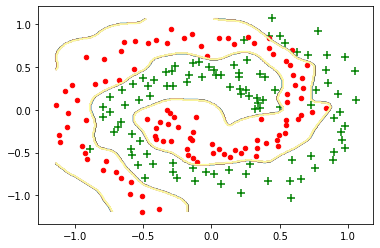

In [56]:
sv = SVC(kernel="rbf",C=1,gamma=opt_gamma)
sv.fit(X,y)           #  学習
print('テスト誤差: ', 1-sv.score(tX,ty))
cplot(sv,X,y)

## 小さい gamma 

テスト誤差:  0.41100000000000003


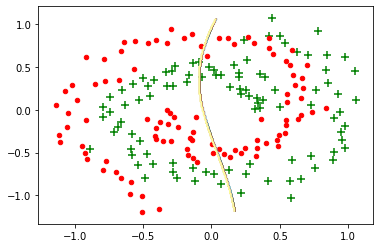

In [57]:
sv = SVC(kernel="rbf",C=1,gamma=cg.min())
sv.fit(X,y)                     # 学習
print("テスト誤差: ", 1-sv.score(tX,ty))            
cplot(sv,X,y)

## 大きい gamma

テスト誤差:  0.08699999999999997


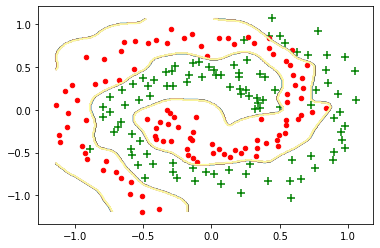

In [58]:
sv = SVC(kernel="rbf",C=1,gamma=cg.max())
sv.fit(X,y)             # 学習
print('テスト誤差: ',1-sv.score(tX,ty))          
cplot(sv,X,y)